In [34]:
import pandas as pd                 
import matplotlib.pyplot as plt    
import seaborn as sns              

In [35]:
# Loading & reading the dataset csv
df = pd.read_csv('Data for the Assessment.csv')
df

,ASIN,Campaign,Date,Sales,Ad Spend,Cost,Impressions,Clicks
0,B096006,Packaging - B2B,2025-07-01,554.73,88.95,NaN,20033.0,447.0
1,B066282,Utensils - New Launch,2025-07-02,843.81,241.56,449.75,11805.0,1193.0
2,B027150,Trays - Amazon Ads,2025-07-03,388.04,180.14,408.37,36851.0,NaN
3,B067599,Utensils - New Launch,2025-07-04,905.97,359.22,300.54,27832.0,1510.0
4,B081079,Utensils - New Launch,2025-07-05,450.28,330.63,511.18,64437.0,1902.0
...,...,...,...,...,...,...,...,...
495,B049790,Cups - Summer Promo,2026-11-08,906.70,114.51,137.17,12002.0,1363.0
496,B032804,Trays - Amazon Ads,2026-11-09,111.70,254.52,232.57,NaN,2392.0
497,B053060,Cups - Summer Promo,2026-11-10,176.96,288.58,476.76,80222.0,1288.0
498,B060526,Cups - Summer Promo,2026-11-11,287.10,NaN,345.91,95840.0,1023.0


In [36]:
# checking the shape of the data
df.shape

(500, 8)

In [37]:
# checking the data types
df.dtypes

ASIN            object
Campaign        object
Date            object
Sales          float64
Ad Spend       float64
Cost           float64
Impressions    float64
Clicks         float64
dtype: object

In [38]:
# checking null values
df.isnull().sum()

ASIN            0
Campaign        0
Date            0
Sales          25
Ad Spend       25
Cost           25
Impressions    25
Clicks         25
dtype: int64

In [39]:
# checking the duplicates
num_duplicates = df.duplicated().sum()
print(f"Duplicate rows count: {num_duplicates}")

Duplicate rows count: 0


In [40]:
# Removing duplicates
df_clean = df.drop_duplicates()
print("Shape after duplicate removal:", df_clean.shape)

Shape after duplicate removal: (500, 8)


In [41]:
# Removing null values
df_clean = df_clean.dropna()  
print("Shape after missing data removal:", df_clean.shape)

Shape after missing data removal: (388, 8)


In [42]:
# Convert relevant columns to numeric type
for column in ['Sales', 'Ad Spend', 'Cost', 'Impressions', 'Clicks']:
    df_clean[column] = pd.to_numeric(df_clean[column], errors='coerce')

In [43]:
#Summary statistics
df_clean.describe()

,Sales,Ad Spend,Cost,Impressions,Clicks
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,549.564201,212.226753,316.147552,47934.466495,1536.126289
std,263.479308,112.300809,166.024998,29575.312641,832.055477
min,104.170000,22.430000,32.820000,1155.000000,50.000000
25%,312.117500,113.732500,166.097500,20833.500000,843.250000
50%,552.215000,208.965000,323.915000,47577.500000,1566.000000
75%,778.435000,312.142500,461.600000,74076.750000,2229.000000
max,997.190000,399.210000,599.670000,99876.000000,2996.000000


In [44]:
# Calculate key metrics
df_clean['ACoS'] = df_clean['Ad Spend'] / df_clean['Sales']
df_clean['CTR'] = df_clean['Clicks'] / df_clean['Impressions']
df_clean['Net_Margin'] = df_clean['Sales'] - df_clean['Cost'] - df_clean['Ad Spend']

In [45]:
df_clean

,ASIN,Campaign,Date,Sales,Ad Spend,Cost,Impressions,Clicks,ACoS,CTR,Net_Margin
1,B066282,Utensils - New Launch,2025-07-02,843.81,241.56,449.75,11805.0,1193.0,0.286273,0.101059,152.50
3,B067599,Utensils - New Launch,2025-07-04,905.97,359.22,300.54,27832.0,1510.0,0.396503,0.054254,246.21
4,B081079,Utensils - New Launch,2025-07-05,450.28,330.63,511.18,64437.0,1902.0,0.734276,0.029517,-391.53
6,B046505,Trays - Amazon Ads,2025-07-07,914.84,118.58,363.65,20873.0,2562.0,0.129618,0.122742,432.61
7,B077300,Trays - Amazon Ads,2025-07-08,182.16,164.28,524.91,41372.0,335.0,0.901845,0.008097,-507.03
...,...,...,...,...,...,...,...,...,...,...,...
491,B012818,Utensils - New Launch,2026-11-04,457.47,217.51,146.30,49454.0,2281.0,0.475463,0.046124,93.66
492,B096002,Packaging - B2B,2026-11-05,701.28,148.06,346.40,29365.0,2208.0,0.211128,0.075192,206.82
494,B022198,Utensils - New Launch,2026-11-07,363.83,183.74,381.11,49200.0,2605.0,0.505016,0.052947,-201.02
495,B049790,Cups - Summer Promo,2026-11-08,906.70,114.51,137.17,12002.0,1363.0,0.126293,0.113564,655.02


In [46]:
# Aggregate metrics by campaign
campaign_metrics = df_clean.groupby('Campaign').agg({
    'Sales': 'sum',
    'ACoS': 'mean',
    'Net_Margin': 'sum',
    'CTR': 'mean'
}).rename(columns={
    'Sales': 'Total_Sales',
    'ACoS': 'Avg_ACoS',
    'Net_Margin': 'Total_Profit',
    'CTR': 'Avg_CTR'
})

print("Sample campaign metrics:\n", campaign_metrics.head())

Sample campaign metrics:
                        Total_Sales  Avg_ACoS  Total_Profit   Avg_CTR
Campaign                                                            
Cups - Summer Promo       42566.81  0.623484      -3977.21  0.096892
Packaging - B2B           54646.03  0.484886       6003.56  0.087019
Plates - Wholesale        39163.12  0.536645       3376.54  0.123354
Trays - Amazon Ads        31477.42  0.585285       -995.76  0.049506
Utensils - New Launch     45377.53  0.516918       3814.55  0.068890


In [47]:
df2 = df_clean.copy()

In [48]:
# Section 2

# Convert 'Date' to datetime if not already done
df2['Date'] = pd.to_datetime(df2['Date'])

# Calculate metrics if not done already
df2['Net Margin'] = df2['Sales'] - df2['Cost'] - df2['Ad Spend']
df2['Profit Margin %'] = (df2['Net Margin'] / df2['Sales']) * 100
df2['ACoS'] = df2['Ad Spend'] / df2['Sales']
df2['CTR'] = df2['Clicks'] / df2['Impressions']

# Extract month as string for grouping
df2['YearMonth'] = df2['Date'].dt.to_period('M').astype(str)
df2

,ASIN,Campaign,Date,Sales,Ad Spend,Cost,Impressions,Clicks,ACoS,CTR,Net_Margin,Net Margin,Profit Margin %,YearMonth
1,B066282,Utensils - New Launch,2025-07-02,843.81,241.56,449.75,11805.0,1193.0,0.286273,0.101059,152.50,152.50,18.072789,2025-07
3,B067599,Utensils - New Launch,2025-07-04,905.97,359.22,300.54,27832.0,1510.0,0.396503,0.054254,246.21,246.21,27.176397,2025-07
4,B081079,Utensils - New Launch,2025-07-05,450.28,330.63,511.18,64437.0,1902.0,0.734276,0.029517,-391.53,-391.53,-86.952563,2025-07
6,B046505,Trays - Amazon Ads,2025-07-07,914.84,118.58,363.65,20873.0,2562.0,0.129618,0.122742,432.61,432.61,47.288050,2025-07
7,B077300,Trays - Amazon Ads,2025-07-08,182.16,164.28,524.91,41372.0,335.0,0.901845,0.008097,-507.03,-507.03,-278.343215,2025-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,B012818,Utensils - New Launch,2026-11-04,457.47,217.51,146.30,49454.0,2281.0,0.475463,0.046124,93.66,93.66,20.473474,2026-11
492,B096002,Packaging - B2B,2026-11-05,701.28,148.06,346.40,29365.0,2208.0,0.211128,0.075192,206.82,206.82,29.491786,2026-11
494,B022198,Utensils - New Launch,2026-11-07,363.83,183.74,381.11,49200.0,2605.0,0.505016,0.052947,-201.02,-201.02,-55.251079,2026-11
495,B049790,Cups - Summer Promo,2026-11-08,906.70,114.51,137.17,12002.0,1363.0,0.126293,0.113564,655.02,655.02,72.242197,2026-11


In [49]:
# Aggregate monthly metrics
monthly_metrics = df2.groupby('YearMonth').agg({
    'Sales': 'sum',
    'Cost': 'sum',
    'Ad Spend': 'sum',
    'Net Margin': 'sum'
}).reset_index()
monthly_metrics['Profit Margin %'] = (monthly_metrics['Net Margin'] / monthly_metrics['Sales']) * 100
monthly_metrics

,YearMonth,Sales,Cost,Ad Spend,Net Margin,Profit Margin %
0,2025-07,14230.14,7582.39,5231.34,1416.41,9.953591
1,2025-08,11252.95,7873.97,4186.71,-807.73,-7.177940
2,2025-09,13978.66,8167.03,4480.73,1330.90,9.520941
3,2025-10,14815.27,7926.54,5571.82,1316.91,8.888869
4,2025-11,11544.89,5391.02,3842.22,2311.65,20.023144
5,2025-12,15730.71,8844.72,6302.67,583.32,3.708161
6,2026-01,9813.63,7311.11,5249.32,-2746.80,-27.989643
7,2026-02,10067.59,7893.34,5128.39,-2954.14,-29.343070
8,2026-03,12636.40,7715.46,5571.94,-651.00,-5.151784
9,2026-04,11463.08,5325.14,4889.56,1248.38,10.890441


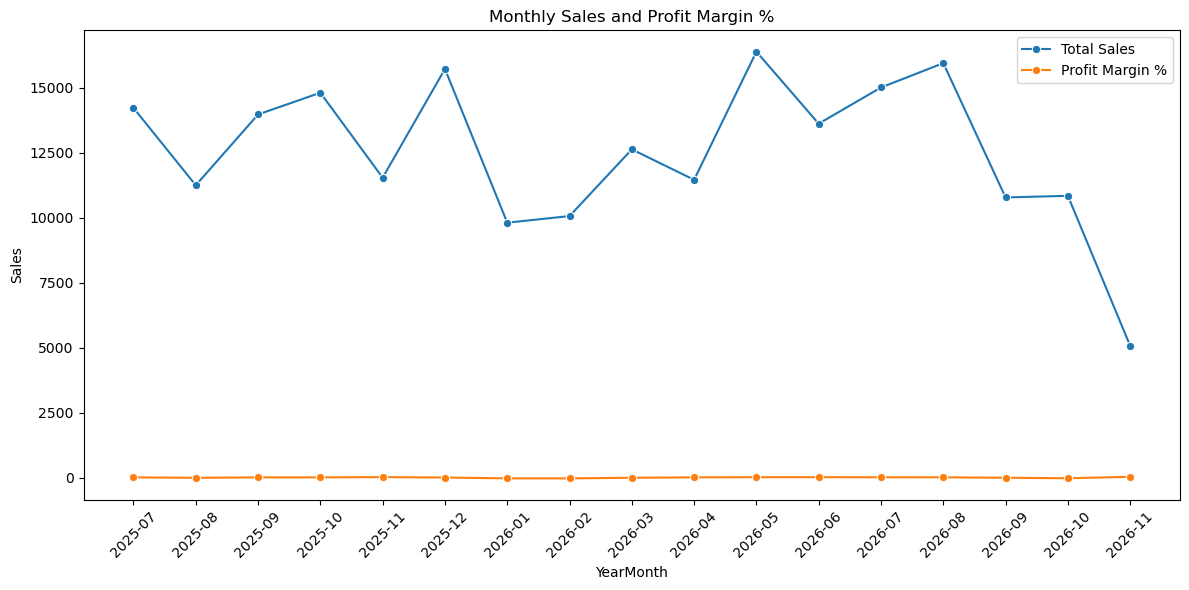

In [50]:
# Plot monthly sales and profit margin %
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_metrics, x='YearMonth', y='Sales', marker='o', label='Total Sales')
sns.lineplot(data=monthly_metrics, x='YearMonth', y='Profit Margin %', marker='o', label='Profit Margin %')
plt.title('Monthly Sales and Profit Margin %')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## **Monthly Sales and Profit Margin % Line Chart**

- **This line chart shows how total sales and profit margin % change over time, month by month.**

- **There are months where sales increase but profit margins fall—highlighting periods where higher revenue was achieved at the cost of declining profitability.**

- **In some recent periods, both sales and profit margins decline together, pointing to deteriorating business performance.**

- **The divergence between high sales and low profit margin suggests that costs (especially advertising) rose faster than sales revenue, cutting into profitability.**

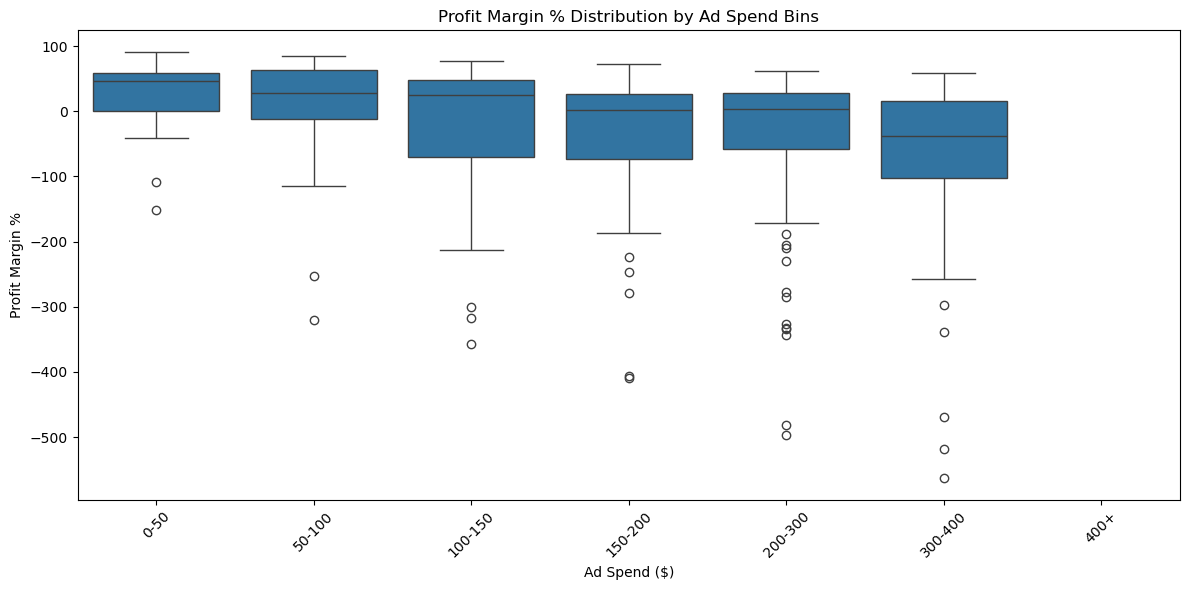

In [51]:
# Create Ad Spend bins 

import numpy as np

max_ad_spend = df2['Ad Spend'].max()
bins = [0, 50, 100, 150, 200, 300, 400, max_ad_spend + 1]  
labels = ['0-50', '50-100', '100-150', '150-200', '200-300', '300-400', '400+']

df2['AdSpend_bin'] = pd.cut(df2['Ad Spend'], bins=bins, labels=labels, include_lowest=True)

# Plot boxplot of Profit Margin % by Ad Spend bin
plt.figure(figsize=(12,6))
sns.boxplot(x='AdSpend_bin', y='Profit Margin %', data=df2)
plt.title('Profit Margin % Distribution by Ad Spend Bins')
plt.xlabel('Ad Spend ($)')
plt.ylabel('Profit Margin %')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Profit Margin % Distribution by Ad Spend Box Plot**

- **The box plot displays how profit margins are distributed across different ad spend brackets.**

- **Median profit margin consistently drops as ad spend increases, with higher spend often resulting in negative margins.**

- **The spread (variability) and number of negative outliers both increase with higher ad spend, showing more frequent and severe losses in those bins.**

- **This underscores that high ad spend does not guarantee profitability—instead, it often leads to inefficient spending and losses without a proportional rise in net sales.**

In [52]:
print(df_clean['ASIN'].unique())


['B066282' 'B067599' 'B081079' 'B046505' 'B077300' 'B088121' 'B077785'
 'B076474' 'B053818' 'B055760' 'B082736' 'B083390' 'B043757' 'B045198'
 'B027097' 'B032253' 'B094212' 'B032237' 'B056040' 'B086615' 'B025549'
 'B090229' 'B033859' 'B085361' 'B030753' 'B093389' 'B024493' 'B019554'
 'B014960' 'B022587' 'B016882' 'B045646' 'B070768' 'B097721' 'B044795'
 'B019484' 'B065429' 'B068454' 'B084988' 'B053915' 'B080065' 'B042746'
 'B060857' 'B037614' 'B019515' 'B013363' 'B041293' 'B020557' 'B033609'
 'B050033' 'B072081' 'B099410' 'B075360' 'B012925' 'B031671' 'B086779'
 'B097727' 'B023743' 'B010258' 'B090083' 'B093180' 'B062125' 'B083607'
 'B088802' 'B072210' 'B048241' 'B062075' 'B096402' 'B017495' 'B057680'
 'B034827' 'B021697' 'B070623' 'B084796' 'B067495' 'B054287' 'B053578'
 'B054487' 'B063170' 'B015466' 'B064436' 'B094642' 'B017064' 'B079198'
 'B020091' 'B070456' 'B091619' 'B051723' 'B073923' 'B025504' 'B032094'
 'B093340' 'B033971' 'B045887' 'B083743' 'B095242' 'B024399' 'B054430'
 'B082

In [53]:
top3_asins = df_clean.groupby('ASIN')['Sales'].sum().sort_values(ascending=False).head(3)
print("Top 3 ASINs by Sales:")
print(top3_asins)


Top 3 ASINs by Sales:
ASIN
B066870    997.19
B077379    996.97
B086779    993.67
Name: Sales, dtype: float64


In [54]:
# Section 3

import pandas as pd

# Assuming df_clean is your cleaned dataset loaded earlier

# Select the target ASIN
target_asin = "B066870"

# Filter data for this ASIN
product_df = df_clean[df_clean['ASIN'] == target_asin].copy()

# Calculate total units sold (using Clicks as proxy)
units_sold = product_df['Clicks'].sum()

# Calculate total sales revenue
total_sales = product_df['Sales'].sum()

# Calculate total costs
total_cost = product_df['Cost'].sum()

# Calculate total ad spend
ad_spend_total = product_df['Ad Spend'].sum()

# Calculate Amazon fees (15% of list price per unit sold)
# Assuming current list price derived from total sales / units sold
current_list_price = total_sales / units_sold
amazon_fees = units_sold * current_list_price * 0.15

# Calculate net margin
net_margin = total_sales - total_cost - ad_spend_total - amazon_fees
# And current margin percentage
current_margin_pct = net_margin / total_sales

print(f"Current Net Margin %: {current_margin_pct:.2%}")

# Calculate the target list price for 20% net margin
# Rearranged formula:
# (List_Price * Units_Sold) - Cost - Ad_Spend - 0.15 * List_Price * Units_Sold = 0.20 * (List_Price * Units_Sold)
# Solving for List_Price:
target_price = (total_cost + ad_spend_total) / (units_sold * (1 - 0.15 - 0.20))

print(f"Target List Price for 20% Margin: ${target_price:.2f}")


Current Net Margin %: 54.56%
Target List Price for 20% Margin: $0.34


In [56]:
# sku_summary now has margin and target price columns for each SKU

def calculate_margin_and_price(row, target_margin=0.20, amazon_fee_pct=0.15):
    units = row['units_sold']
    total_cost = row['total_cost']
    ad_spend = row['ad_spend']
    sales = row['sales']
    
    # Current net margin %
    amazon_fees = units * (sales / units) * amazon_fee_pct
    net_margin = sales - total_cost - ad_spend - amazon_fees
    current_margin_pct = net_margin / sales
    
    # Target price for desired margin
    target_price = (total_cost + ad_spend) / (units * (1 - amazon_fee_pct - target_margin))
    
    return pd.Series([current_margin_pct, target_price], index=['Current Margin %', 'Target Price'])

# Aggregate per ASIN
sku_summary = df_clean.groupby('ASIN').agg({
    'Clicks':'sum',
    'Cost':'sum',
    'Ad Spend':'sum',
    'Sales':'sum'
}).rename(columns={'Clicks':'units_sold', 'Cost':'total_cost', 'Ad Spend':'ad_spend', 'Sales':'sales'})

# Apply function to all SKUs
results = sku_summary.apply(calculate_margin_and_price, axis=1)
sku_summary = sku_summary.join(results)
sku_summary



,units_sold,total_cost,ad_spend,sales,Current Margin %,Target Price
ASIN,,,,,,
B010258,1528.0,484.75,208.62,972.37,0.136928,0.698117
B010606,1396.0,53.91,89.20,411.71,0.502401,0.157714
B010610,2516.0,596.66,54.76,154.97,-3.353523,0.398325
B010757,317.0,411.61,240.43,928.79,0.147968,3.164475
B010764,1900.0,68.86,351.18,649.56,0.203347,0.340113
...,...,...,...,...,...,...
B098116,505.0,508.72,202.35,779.62,-0.062073,2.166245
B098351,2656.0,323.94,68.97,987.86,0.452261,0.227589
B099192,1524.0,509.96,152.17,389.87,-0.848335,0.668413


# Section 4
## **Data Communication Summary**
- **An analysis of profitability and advertising spend reveals two key insights for strategic improvement.**
- **First, profit margins decline sharply as advertising spend increases across campaigns, demonstrating diminishing returns and cost inefficiencies at higher budget levels.**
- **Second, select SKUs display strong current margins (over 50%) and offer pricing flexibility that can be leveraged to enhance profitability.**
**Based on this, it is recommended to optimize ad spends by reallocating budgets from low-margin, high-spend campaigns to more profitable products. 
Additionally, implementing dynamic pricing models aimed at maintaining target profit margins will ensure sustained profitability across the product portfolio.**

**The Below visualization reinforces the insight about margin erosion with increased ad spend and supports the recommendation on budget optimization.**


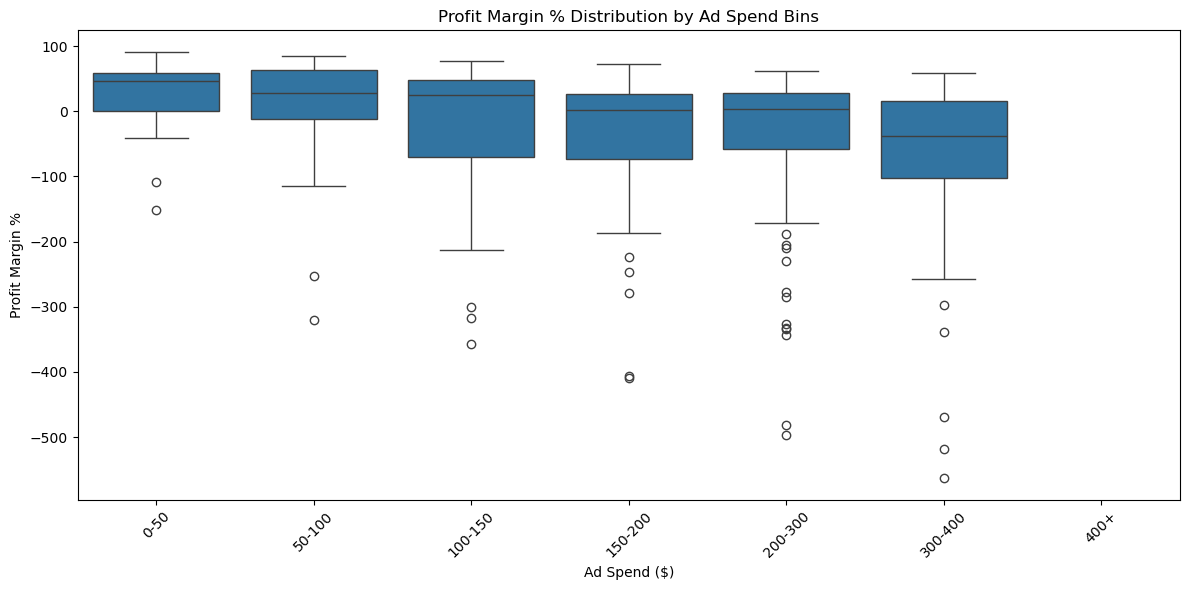

In [58]:
# the Python code to generate a clear, annotated boxplot visualization of Profit Margin by Ad Spend bins to support this:

import numpy as np

max_ad_spend = df2['Ad Spend'].max()
bins = [0, 50, 100, 150, 200, 300, 400, max_ad_spend + 1]  
labels = ['0-50', '50-100', '100-150', '150-200', '200-300', '300-400', '400+']

df2['AdSpend_bin'] = pd.cut(df2['Ad Spend'], bins=bins, labels=labels, include_lowest=True)

# Plot boxplot of Profit Margin % by Ad Spend bin
plt.figure(figsize=(12,6))
sns.boxplot(x='AdSpend_bin', y='Profit Margin %', data=df2)
plt.title('Profit Margin % Distribution by Ad Spend Bins')
plt.xlabel('Ad Spend ($)')
plt.ylabel('Profit Margin %')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Section 5

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('Data for the Assessment.csv')

# Clean the data
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data['Date'] = pd.to_datetime(data['Date'])

# Calculate metrics
data['ACoS'] = data['Ad Spend'] / data['Sales']  # 
data['CTR'] = data['Clicks'] / data['Impressions']     
data['Net Margin Percent'] = (data['Sales'] - data['Cost'] - data['Ad Spend']) / data['Sales']

# Top 5 best-selling products by total sales
top_5_products = data.groupby('ASIN')['Sales'].sum().sort_values(ascending=False).head(5).index.tolist()

# Scatterplot: Sales vs Advertising Spend
plt.figure(figsize=(10,6))
sns.scatterplot(x='Ad Spend', y='Sales', data=data)
plt.title('Sales vs Advertising Spend')
plt.savefig('sales_vs_advertising_spend.png')
plt.show()

# Bar chart: Average Net Margin % by Campaign
campaign_margin_avg = data.groupby('Campaign')['Net Margin Percentage'].mean().sort_values()
plt.figure(figsize=(10,6))
campaign_margin_avg.plot(kind='barh')
plt.title('Average Net Margin Percentage by Campaign')
plt.xlabel('Net Margin Percentage')
plt.savefig('net_margin_percent_by_campaign.png')
plt.show()

# Bonus: Find top 5 products by sales within each campaign and save as CSV
top5_campaign = data.groupby(['Campaign', 'ASIN'])['Sales'].sum().reset_index()
top5_campaign = top5_campaign.sort_values(['Campaign', 'Sales'], ascending=[True, False])
top5_campaign = top5_campaign.groupby('Campaign').head(5)
top5_campaign.to_csv('top5_campaign.csv', index=False)
